# Предподготовка данных

In [1]:
import pandas as pd
import numpy as np

import datetime

In [2]:
df_train = pd.read_csv("data/train.csv")

In [3]:
tvr_18 = "Все 18+_TVR"
tvr_55 = "Все 55+_TVR"

share_18 = "Все 18+_Share"
share_55 = "Все 55+_Share"

df_train.columns

Index(['Unnamed: 0', 'Год', 'Месяц', 'День', 'Время', 'Канал', 'Все 18+_TVR',
       'Все 55+_TVR', 'Все 18+_Share', 'Все 55+_Share', 'Дата_День',
       'next_day', 'Дата'],
      dtype='object')

In [4]:
df_train["День"] = df_train["День"].apply(lambda x: int(x.split()[1]))

In [5]:
df_train["Канал"].value_counts()

РОССИЯ 1        14016
РЕН ТВ          14016
ТНТ             14016
СТС             14016
ПЕРВЫЙ КАНАЛ    14016
Name: Канал, dtype: int64

In [6]:
dates = np.array(df_train["Дата_День"])

df_train["day_datetime"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), "%Y-%m-%d"))
df_train["weekday"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday())

In [7]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6


# Анализ

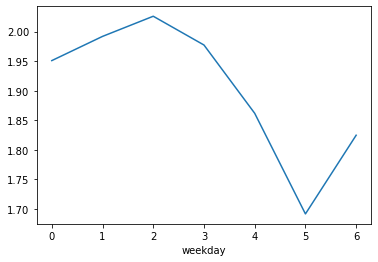

In [8]:
df_train[df_train["Канал"] == "ПЕРВЫЙ КАНАЛ"].groupby("weekday")[tvr_18].mean().plot()

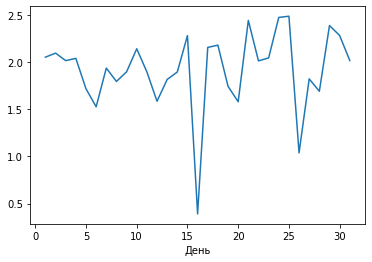

In [9]:
df_train[(df_train["Канал"] == "ПЕРВЫЙ КАНАЛ") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2019)].groupby("День")[tvr_18].mean().plot()

## Веб-скреппинг

In [10]:
import requests
from bs4 import BeautifulSoup

### 1. Новостной сайт
Отсюда я беру суммарное количество просмотров на всех статьях за день

In [11]:
url = "https://neftegaz.ru/archive/news/?date=01.10.2019"

request = requests.get(url)
request.ok

True

In [12]:
q = BeautifulSoup(request.text)
views_html = q.findAll("div", {"class": "views2"})

In [13]:
def int_check(x):
    try:
        int(str(x))
        return True
    except ValueError:
        return False

views = list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html))
views_sum = sum(views)
views_sum

63614

In [14]:
days = df_train["Дата_День"].apply(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), "%d.%m.%Y")).unique()
days

array(['01.11.2018', '03.11.2018', '04.11.2018', '06.11.2018',
       '07.11.2018', '08.11.2018', '10.11.2018', '11.11.2018',
       '12.11.2018', '13.11.2018', '14.11.2018', '16.11.2018',
       '18.11.2018', '20.11.2018', '21.11.2018', '22.11.2018',
       '23.11.2018', '25.11.2018', '26.11.2018', '27.11.2018',
       '28.11.2018', '29.11.2018', '01.12.2018', '03.12.2018',
       '04.12.2018', '05.12.2018', '06.12.2018', '08.12.2018',
       '09.12.2018', '10.12.2018', '11.12.2018', '12.12.2018',
       '13.12.2018', '14.12.2018', '15.12.2018', '17.12.2018',
       '18.12.2018', '19.12.2018', '21.12.2018', '22.12.2018',
       '23.12.2018', '24.12.2018', '25.12.2018', '27.12.2018',
       '29.12.2018', '30.12.2018', '31.12.2018', '01.01.2019',
       '02.01.2019', '03.01.2019', '04.01.2019', '05.01.2019',
       '06.01.2019', '07.01.2019', '08.01.2019', '09.01.2019',
       '11.01.2019', '12.01.2019', '13.01.2019', '14.01.2019',
       '15.01.2019', '16.01.2019', '17.01.2019', '18.01

In [15]:
views_month = []

for d in range(1, 30):
    url_ = "https://neftegaz.ru/archive/news/?date={0}.10.2020".format(str(d))
#     url_ = "https://neftegaz.ru/archive/news/?date={0}".format(str(days[dayIndex]))
    request_ = requests.get(url_)
    q_ = BeautifulSoup(request_.text)
    views_html_ = q_.findAll("div", {"class": "views2"})
    views_sum_ = sum(list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html_)))
    
    views_month.append(views_sum_)
    

#### Связь между количеством просмотров на новостном сайте и TVR на телеканале "Россия 1"

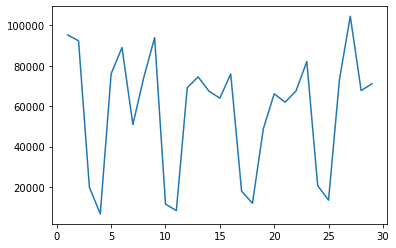

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, 30), views_month)

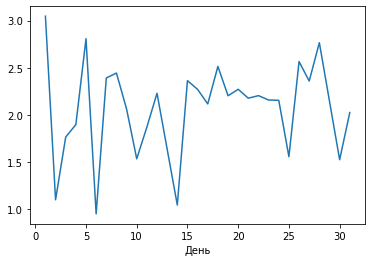

In [17]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020.plot()

In [18]:
np.corrcoef(views_month, tvr_october2020)

array([[1.        , 0.08491093],
       [0.08491093, 1.        ]])

#### Сдвиг

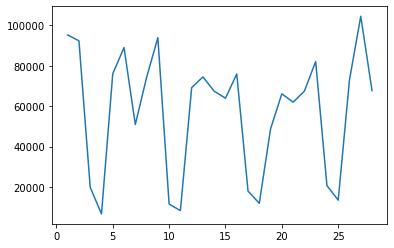

In [19]:
def make_shift_back(arr, shift = 1): # сдвиг назад
    return arr[:- shift]

def make_shift_forward(arr, shift = 1): # сдвиг вперед
    return arr[shift:]

plt.plot(range(1, 29), make_shift_back(views_month, 1))

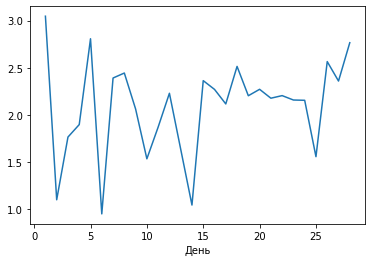

In [20]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020[: -2].plot()

In [21]:
for i in range(1, 10):
    print(i, np.corrcoef(make_shift_back(views_month, i), tvr_october2020[i :]))

1 [[ 1.         -0.44509703]
 [-0.44509703  1.        ]]
2 [[1.         0.03116906]
 [0.03116906 1.        ]]
3 [[1.         0.29080981]
 [0.29080981 1.        ]]
4 [[ 1.         -0.20652145]
 [-0.20652145  1.        ]]
5 [[ 1.         -0.22140569]
 [-0.22140569  1.        ]]
6 [[1.         0.27994519]
 [0.27994519 1.        ]]
7 [[ 1.         -0.00904345]
 [-0.00904345  1.        ]]
8 [[ 1.        -0.3148121]
 [-0.3148121  1.       ]]
9 [[1.00000000e+00 1.43693367e-04]
 [1.43693367e-04 1.00000000e+00]]


#### Обработка всех дней df_train

Данные по всем днем тренировочной выборки получены с помощью скрипта get_views.py и загружены в data/news_data.txt

In [22]:
import json

all_views = {}

with open("data/news_data.txt", "r") as file:
    all_views = json.loads(file.read())

# Изменение формата дат
all_views = pd.Series(all_views)
all_views.index = list(map(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%d.%m.%Y"), "%Y-%m-%d"), pd.Series(all_views).index))
all_views = all_views.to_dict()

In [23]:
df_train["news_views"] = list(map(lambda x: all_views[x], np.array(df_train["day_datetime"])))

In [24]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday,news_views
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3,70884
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3,70884
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3,70884
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3,70884
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3,70884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6,10911
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6,10911
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6,10911
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6,10911


In [25]:
news_views_r1 = df_train[df_train["Канал"] == "РОССИЯ 1"]["news_views"]
tvr_r1 = df_train[df_train["Канал"] == "РОССИЯ 1"][tvr_18]
np.corrcoef(news_views_r1, tvr_r1) # базовая корреляция

array([[1.        , 0.12906197],
       [0.12906197, 1.        ]])

In [26]:
for i in range(1, 7):
    print("---Shift: {0}---".format(i))
    print("Back shift correlation:\n {1}".format(i, np.corrcoef(make_shift_back(news_views_r1, i), tvr_r1[i :])))
    print("Forward shift correlation:\n {1}".format(i, np.corrcoef(make_shift_forward(news_views_r1, i), tvr_r1[: -i])))

---Shift: 1---
Back shift correlation:
 [[1.         0.12207634]
 [0.12207634 1.        ]]
Forward shift correlation:
 [[1.         0.13186702]
 [0.13186702 1.        ]]
---Shift: 2---
Back shift correlation:
 [[1.         0.11830992]
 [0.11830992 1.        ]]
Forward shift correlation:
 [[1.         0.13291738]
 [0.13291738 1.        ]]
---Shift: 3---
Back shift correlation:
 [[1.         0.11894313]
 [0.11894313 1.        ]]
Forward shift correlation:
 [[1.         0.13683708]
 [0.13683708 1.        ]]
---Shift: 4---
Back shift correlation:
 [[1.         0.12087597]
 [0.12087597 1.        ]]
Forward shift correlation:
 [[1.         0.13373749]
 [0.13373749 1.        ]]
---Shift: 5---
Back shift correlation:
 [[1.         0.12240844]
 [0.12240844 1.        ]]
Forward shift correlation:
 [[1.         0.12854264]
 [0.12854264 1.        ]]
---Shift: 6---
Back shift correlation:
 [[1.         0.12095197]
 [0.12095197 1.        ]]
Forward shift correlation:
 [[1.         0.12790146]
 [0.12

In [27]:
df_train["news_views_shift"] = make_shift_forward(df_train["news_views"], 3)

In [28]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday,news_views,news_views_shift
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3,70884,NaN
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3,70884,NaN
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3,70884,NaN
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3,70884,70884.0
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3,70884,70884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6,10911,10911.0
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6,10911,10911.0
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6,10911,10911.0
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6,10911,10911.0


Лучший сдвиг - сдвиг вперед на 3 дня

### 2. Погода

In [190]:
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path = "/home/egoluback/Documents/NTI/2_stage/ML/2_stage/task2/scrapping/chromedriver")

In [191]:
url_meteopost = "https://www.gismeteo.ru/diary/4079/"

driver.get(url_meteopost)

In [192]:
driver.find_element_by_xpath("//select[@name = 'sd_distr']/option[text() = 'Москва (город федерального значения)']").click()

driver.find_element_by_xpath("//select[@name = 'Month']/option[text() = 'Октябрь']").click()

driver.find_element_by_xpath("//select[@name = 'Year']/option[text() = '2018']").click()

driver.find_element_by_xpath("//select[@name = 'sd_city']/option[text() = 'Москва']").click()

driver.find_element_by_xpath("//button[@id = 'selector_go_btn']").click()

In [193]:
weather_pd = pd.read_html(driver.find_element_by_xpath('//table').get_attribute('outerHTML'))[0]

In [232]:
temp_day = pd.Series(weather_pd['День']['Температура'], name = "temp_day")
temp_night = pd.Series(weather_pd['Вечер']['Температура'], name = "temp_night")

result_temp = pd.merge(temp_day, temp_night, right_index = True, left_index = True)

result_temp

,temp_day,temp_night
0,14,8
1,10,9
2,10,8
3,7,6
4,7,6
5,13,12
6,16,15
7,7,1
8,9,6
9,13,12


In [212]:
def time_check(hour):
    if (hour >= 9 and hour <= 17): return "day"
    else: return "night"

days_time = df_train["Дата"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

days_full = pd.merge(pd.Series(days_time, name = "date"), pd.Series(days_time.apply(lambda x: time_check(x.hour)), name = "time"), right_index = True, left_index = True)

In [226]:
days_full["temperature"] = np.zeros(len(list(days_full["date"])))
days_full["temperature"].iloc[0] = 1

days_full

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,date,time,temperature
0,2018-11-01 05:00:00,night,1.0
1,2018-11-01 06:00:00,night,0.0
2,2018-11-01 07:00:00,night,0.0
3,2018-11-01 08:00:00,night,0.0
4,2018-11-01 09:00:00,day,0.0
...,...,...,...
70075,2020-11-01 00:00:00,night,0.0
70076,2020-11-01 01:00:00,night,0.0
70077,2020-11-01 02:00:00,night,0.0
70078,2020-11-01 03:00:00,night,0.0


## Выходные дни

In [29]:
holidays = []
date_format = "%Y-%m-%d"

for year in [2018, 2019, 2020]:
    for day in range(1, 9):
        holidays.append(datetime.datetime.strptime("{1}-01-{0}".format(day, year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-02-23".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-03-08".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-01".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-09".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-06-12".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-11-04".format(year), date_format))

holidays_str = list(map(lambda x: datetime.datetime.strftime(x, date_format), holidays))

In [30]:
df_train["working_day"] = ~np.isin(df_train["day_datetime"], holidays_str)

In [31]:
df_train["working_day"] = ~(df_train["weekday"] >= 5)

In [32]:
df_train["working_day"].value_counts()

True     50495
False    19585
Name: working_day, dtype: int64

In [33]:
df_train[~df_train["working_day"]][tvr_18].mean(), df_train[df_train["working_day"]][tvr_18].mean()

(1.2513316313505252, 1.2402645806515527)

# Идеи:
<b> погода </b> <br />
статистика поисковых запросов <br />
курс валюты <br />
s&p 500 <br />
индекс самоизоляции